---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "Dinamika tariff di Indonesia dari 2000 - 2018"
subtitle: "Ilustrasi dengan python dan WITS API"
summary: ""
authors: [admin]
tags: [python,tarif,perdagangan,ekonomi]
categories: [python,tarif,perdagangan,ekonomi]
date: 2020-11-05T22:26:15+11:00
lastmod: 2020-11-05T22:26:15+11:00
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

Tempo hari, saya diundang oleh kolega saya Ibu [Deasy Pane](https://www.linkedin.com/in/deasy-damayanti-p-pane-a618a68/?originalSubdomain=id) dari Bappenas untuk ngobrol-ngobrol tentang trade. Tentu saja via zoom. Hadir juga rekan saya [Donny](https://www.linkedin.com/in/donny-pasaribu/?originalSubdomain=au) dan [Mas Chandra](https://crawford.anu.edu.au/people/phd/chandra-putra). 

Pada kesempatan tersebut, kolega Bu Deasy dari Bappenas bertanya soal dinamika tariff. Memang ekspor dan impor Indonesia cenderung volatil jika kita melihat hanya manufaktur saja. Bisa jadi ini gara-gara terjadi perubahan pola proteksionisme terhadap industri di Indonesia, setidaknya di sektor manufaktur. Secara umum, proteksionisme Indonesia memang [mulai menurun](https://scholar.ui.ac.id/en/publications/fifty-years-of-trade-policy-in-indonesia-new-world-trade-old-trea) sejak krisis 98 [jika kita bicara soal tariff](https://www.lowyinstitute.org/publications/trade-protectionism-indonesia-bad-times-and-bad-policy). Namun dinamika proteksionisme memang agak berubah ketika *commodity boom* dimulai. Meski NTM mungkin memainkan peranan yang lebih tinggi di periode *boom* komoditas, tapi ada baiknya kita lihat kembali dinamika tariff sejak krisis 98.

Sekalian, berhubung postingan kemarin saya mencoba ngasi liat cara [narik data pake API-nya world bank](https://krisna.netlify.app/id/post/imporinput/), kali ini saya pake api-nya WITS (ya world bank juga si) yaitu [world_trade_data](https://github.com/mwouts/world_trade_data). Installnya mudah, cukup:

```python
pip install world_trade_data --upgrade
```

Perhitungan tariff itu ada banyak. Namun untuk merepresentasikan hanya perubahan kebijakan, lebih cocok pakai *simple average* karena tidak dibobot dengan impor. Saya akan pake *effectively applied simple average tariff* (pada dasarnya tariff rate terendah), dan *MFN simple average tariff* yaitu rata-rata tariff untuk negara non-FTA.

In [1]:
import pandas as pd
import world_trade_data as wits
tariff=wits.get_indicators('tradestats-tariff')
tariff=tariff.filter(['name','definition'])
tariff=tariff.loc[['AHS-SMPL-AVRG','MFN-SMPL-AVRG']]
#pd.set_option('display.max_colwidth', None)
tariff

,name,definition
indicatorcode,,
AHS-SMPL-AVRG,AHS Simple Average (%),Effectively Applied Simple Average tariff (%)
MFN-SMPL-AVRG,MFN Simple Average (%),Most Favored Nation ( (MFN) Simple Average tar...


## Tarik mang!

In [2]:
import pandas as pd
import datetime
#pd.set_option('display.max_rows', 20)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
pd.options.display.max_rows=999
b=wits.get_products('tradestats-tariff')
b=b.loc[(b.grouptype=='Sector') & (
    b.index!='Total')].productdescription.values

# MFN tariff, weighted average
a=wits.get_indicator(indicator='MFN-SMPL-AVRG',
reporter='IDN',datasource='tradestats-tariff',
                     year=['2000','2019'])
a=a.reset_index()
a=a.set_index('ProductCode')
c,d,e=a.loc[b[0:4]],a.loc[b[5:10]],a.loc[b[11:]]
c,d,e=c.reset_index(),d.reset_index(),e.reset_index()
a=a.reset_index()

# Effective applied tariff, weighted average
o=wits.get_indicator(indicator='AHS-SMPL-AVRG',
reporter='IDN',datasource='tradestats-tariff',
                     year=['2000','2019'])
o=o.reset_index()
o=o.set_index('ProductCode')
p,q,r=o.loc[b[0:4]],o.loc[b[5:10]],o.loc[b[11:]]
p,q,r=p.reset_index(),q.reset_index(),r.reset_index()
o=o.reset_index()

Untuk Indonesia, agak harus hati-hati pakai data tariff-nya WITS karena tariff tahun 2014 dan 2015 tidak ada. Kalau anda lihat di grafik, dari 2013 langsung lumpat ke 2016 itu gara-gara missing. si Year kayaknya nggak otomatis diset sebagai `datetime`.

Data di WITS API ini dibagi ke dalam 16 sektor yang berbeda yang dikelompokkan berdasarkan kode Harmonise System (HS). Dari ke 16 kelompok tersebut, akan saya plot menjadi 3 grafik yang berbeda. Jadi total ada 6 grafik di postingan kali ini: 3 untuk effective applied tariff, 3 untuk MFN tariff. Ada juga sih pengelompokan lain seperti BEC tapi saya pakai yang HS. berikut pengelompokannya

In [3]:
b

array(['Animal', 'Vegetable', 'Food Products', 'Minerals', 'Fuels',
       'Chemicals', 'Plastic or Rubber', 'Hides and Skins', 'Wood',
       'Textiles and Clothing', 'Footwear', 'Stone and Glass', 'Metals',
       'Mach and Elec', 'Transportation', 'Miscellaneous'], dtype=object)

## Effective Applied Tariff, simple average

Tiga grafik di bawah ini adalah dinamika *effective applied tariff*. Setelah krisis 2008, kebetulan banyak terjadi penurunan tariff di Indonesia gara-gara ASEAN FTA. AFTA berkembang menjadi AKFTA (korea), ACFTA(China), AANZFTA (Australia-New Zealand), dan AIFTA (India) ya di sekitar tahun-tahun ini. Jangan lupa kita juga punya IJEPA. Perjanjian-perjanjian ini otomatis langsung nurunin *effective applied tariff* secara umum.

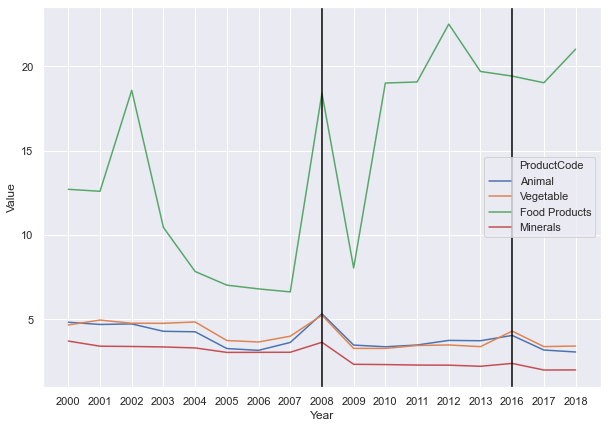

In [4]:
# FIGURES FOR AHS
plt.figure(figsize=(10,7))
sns.lineplot(data=p,x='Year',y='Value',hue='ProductCode')
plt.axvline('2016', color='black')
plt.axvline('2008', color='black')

Pertama kita melihat produk-peroduk primer. Food products ini tariffnya jauh banget ya kalau dibandingkan sama animal, vegetable dan minerals. wk wk wk. Menjelang krisis 2008 memang banyak negara meningkatkan proteksi terhadap bahan pangan sih, jadi ndak heran kalau Indonesia ikut-ikutan. Tapi sepertinya masih tinggi  sampai sekarang. Namun secara keseluruhan, tariff produk primer secara umum sepertinya tetap rendah sampai sekarang. Gak tau ya kalau NTM. wk wk wk.

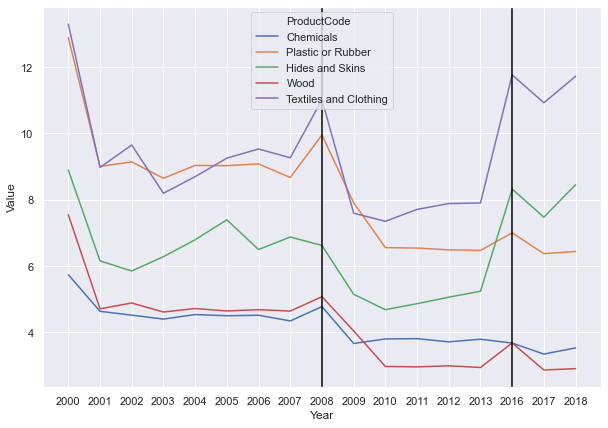

In [5]:
plt.figure(figsize=(10,7))
sns.lineplot(data=q,x='Year',y='Value',hue='ProductCode')
plt.axvline('2016', color='black')
plt.axvline('2008', color='black')

Penurunan tariff yang signifikan terjadi di sektor manufaktur. Menariknya, dulu sekitar tahun 2005-an, kita ramai-ramai dibilang *sunset industry* atau deindustrialisasi prematur justru ketika tariff di sektor ini tinggi-tinggi. *I mean*, lihat tekstil dan kimia. Setelah 2008 tariffnya turun. Tapi sepertinya tariff-tariff ini mulai naik pelan-pelan sejak sekitar tahun 2016 (ingat, 2014 dan 2015 tariffnya *missing*). Deindustrialisasi lagi? Kira-kira ada kejadian besar apa di tahun 2014/2015?

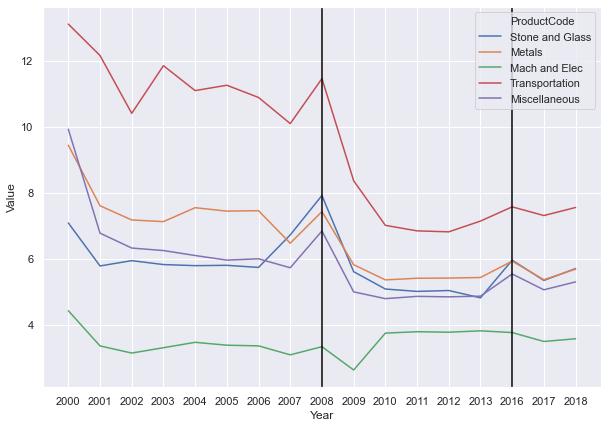

In [6]:
plt.figure(figsize=(10,7))
sns.lineplot(data=r,x='Year',y='Value',hue='ProductCode')
plt.axvline('2016', color='black')
plt.axvline('2008', color='black')

Sementara itu, level tariff di sektor-sektor terkait produk mesin dan elektronik relatif lebih rendah dibandingkan sektor lain, terutama sejak krisis 2008. Sektor mesin dan elektronik termasuk yang maju di Indonesia gak sih? Sektor ini juga sangat tinggi intensitas Global Value Chain (GVC)-nya. Make sense.

## MFN, simple average

Ini sama tapi MFN. Secara umum, harusnya MFN lebih tinggi daripada effectively applied tariff. Tentu saja masih mungkin ada gap yang super tipis di sektor tertentu, terutama jika *Free Trade Agreement* yang diikuti Indonesia tidak meng-*cover* sektor tersebut. Tambah lagi, MFN seharusnya cenderung lebih stabil daripada effective applied, karena sifatnya universal. Kalo effective applied kan langsung ngikutin tiap kali ada FTA baru.

Secara umum sih tren-nya mirip: turun setelah krisis 98, naik di 2016. Tapi kali ini daripada saya mulu yang komentar, gimana kalau gantian? Coba drop komentar anda tentang tariff MFN di komen di bawah ini atau mensyen saya di [{{< icon name="twitter" pack="fas" >}}twitter](https://twitter.com/imedkrisna) supaya kita bisa diskusi he he he.

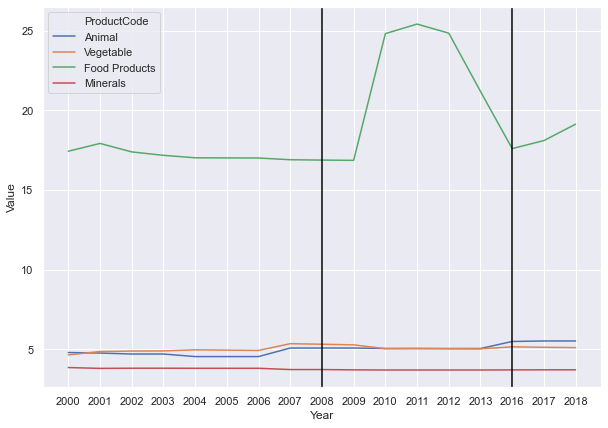

In [7]:
# FIGURES FOR AHS
plt.figure(figsize=(10,7))
sns.lineplot(data=c,x='Year',y='Value',hue='ProductCode')
plt.axvline('2016', color='black')
plt.axvline('2008', color='black')

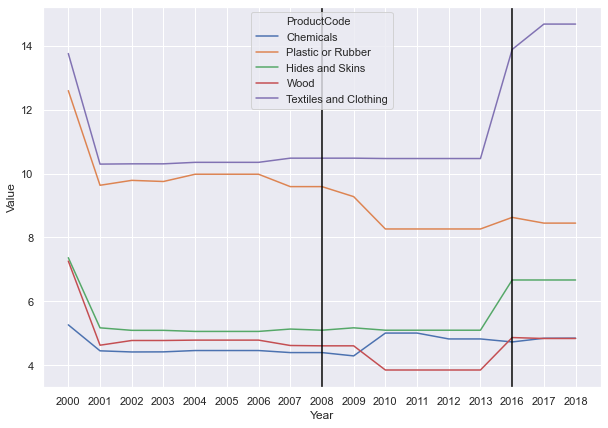

In [8]:
plt.figure(figsize=(10,7))
sns.lineplot(data=d,x='Year',y='Value',hue='ProductCode')
plt.axvline('2016', color='black')
plt.axvline('2008', color='black')

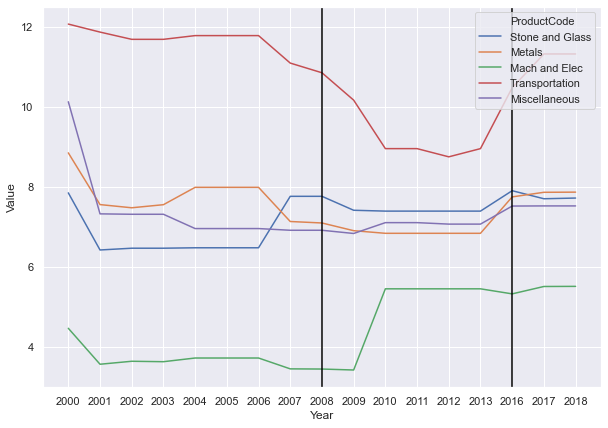

In [9]:
plt.figure(figsize=(10,7))
sns.lineplot(data=e,x='Year',y='Value',hue='ProductCode')
plt.axvline('2016', color='black')
plt.axvline('2008', color='black')